# Plot BF, MST, and LS results

### Creates plots to compare the performance between three algorithms that solve the travelling salesman problem

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Load Data

In [19]:
times = [15,30,60,300]
num_times = len(times)

# Load data into pandas dataframe
df = pd.read_csv('../data/cse_project.csv',header=1)

# Get city (Instance) names
graphs = df['Instance'].iloc[::4].values

def get_dimension(filepath):
    with open(filepath, 'r') as file:
        for line in file:
            if 'DIMENSION' in line:
                space = line.split()
                return int(space[1].strip())  # Get the number and remove extra spaces

def reshape_col(col):
    '''
        Args:
            col (np.array)
                e.g. df['Brute Force'].values
    '''
    # Reshape the array into groups of 4 values
    return col[:len(col) // 4 * 4].reshape(-1, 4) 

# Get city sizes (number of nodes in graph) from .tsp files 
dimensions = []
for graph in graphs:
    dimensions.append(get_dimension(f'../data/{graph}.tsp'))

# Get qualities
BF = reshape_col(df['Brute Force.1'].str.rstrip('%').astype(float).values)
LS = reshape_col(df['Local Search.1'].str.rstrip('%').astype(float).values)
AP = reshape_col(df['Approximate.1'].str.rstrip('%').astype(float).values)

In [20]:
BF

array([[45.84, 45.57, 41.68, 38.68],
       [12.49, 11.14, 11.14,  9.81],
       [29.97, 29.97, 29.97, 29.38],
       [44.4 , 44.4 , 44.29, 43.68],
       [ 0.  ,  0.  ,  0.  ,  0.  ],
       [40.2 , 40.09, 40.09, 40.  ],
       [42.89, 42.89, 42.89, 42.68],
       [51.68, 50.96, 50.96, 49.8 ],
       [27.73, 27.73, 27.72, 27.6 ],
       [38.76, 38.6 , 37.97, 37.7 ],
       [36.81, 36.78, 36.78, 36.54],
       [ 0.  ,  0.  ,  0.  ,  0.  ],
       [27.08, 27.08, 26.88, 26.21]])

In [21]:
df

,Instance,Time (s),Brute Force,Local Search,Approximate,Brute Force.1,Local Search.1,Approximate.1
0,Atlanta,15,4.109867e+06,2.383752e+06,2.380448e+06,45.84%,6.61%,6.49%
1,NaN,30,4.090105e+06,2.313978e+06,2.380448e+06,45.57%,3.80%,6.49%
2,NaN,60,3.816909e+06,2.317747e+06,2.380448e+06,41.68%,3.96%,6.49%
3,NaN,300,3.630532e+06,2.226068e+06,2.380448e+06,38.68%,0.00%,6.49%
4,Berlin,15,2.003340e+04,2.159215e+04,1.040386e+04,12.49%,18.81%,68.51%
5,NaN,30,1.972853e+04,2.131767e+04,1.040386e+04,11.14%,17.76%,68.51%
6,NaN,60,1.972853e+04,1.818402e+04,1.040386e+04,11.14%,3.59%,68.51%
7,NaN,300,1.943843e+04,1.753117e+04,1.040386e+04,9.81%,0.00%,68.51%
8,Boston,15,2.246132e+06,1.679287e+06,1.150959e+06,29.97%,6.33%,36.66%
9,NaN,30,2.246132e+06,1.660940e+06,1.150959e+06,29.97%,5.30%,36.66%


### Plot

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
def plot_quality_v_time(times, city, city_size, yBF, yAP, yLS):
    sns.set_theme()
    
    plt.figure(figsize=(7, 6))
    sns.lineplot(x=times, y=yBF, marker='o', label='Brute Force') #, palette="tab10")
    sns.lineplot(x=times, y=yAP, marker='o', label='Minimum Spanning Tree')
    sns.lineplot(x=times, y=yLS, marker='o', label='Simulated Annealing')
    
    # Customize plot labels and title
    plt.title(f'{city}, {city_size} locations', fontsize=14)
    plt.xlabel('Runtime (seconds)', fontsize=12)
    plt.ylabel('Percent relative to the best Simulated Annealing', fontsize=12)
    
    # Show legend
    plt.legend(title='Algorithm')
    
    # Display the plot
    plt.tight_layout()
    plt.show()

In [26]:
df

,Instance,Time (s),Brute Force,Local Search,Approximate,Brute Force.1,Local Search.1,Approximate.1
0,Atlanta,15,4.109867e+06,2.383752e+06,2.380448e+06,45.84%,6.61%,6.49%
1,NaN,30,4.090105e+06,2.313978e+06,2.380448e+06,45.57%,3.80%,6.49%
2,NaN,60,3.816909e+06,2.317747e+06,2.380448e+06,41.68%,3.96%,6.49%
3,NaN,300,3.630532e+06,2.226068e+06,2.380448e+06,38.68%,0.00%,6.49%
4,Berlin,15,2.003340e+04,2.159215e+04,1.040386e+04,12.49%,18.81%,68.51%
5,NaN,30,1.972853e+04,2.131767e+04,1.040386e+04,11.14%,17.76%,68.51%
6,NaN,60,1.972853e+04,1.818402e+04,1.040386e+04,11.14%,3.59%,68.51%
7,NaN,300,1.943843e+04,1.753117e+04,1.040386e+04,9.81%,0.00%,68.51%
8,Boston,15,2.246132e+06,1.679287e+06,1.150959e+06,29.97%,6.33%,36.66%
9,NaN,30,2.246132e+06,1.660940e+06,1.150959e+06,29.97%,5.30%,36.66%


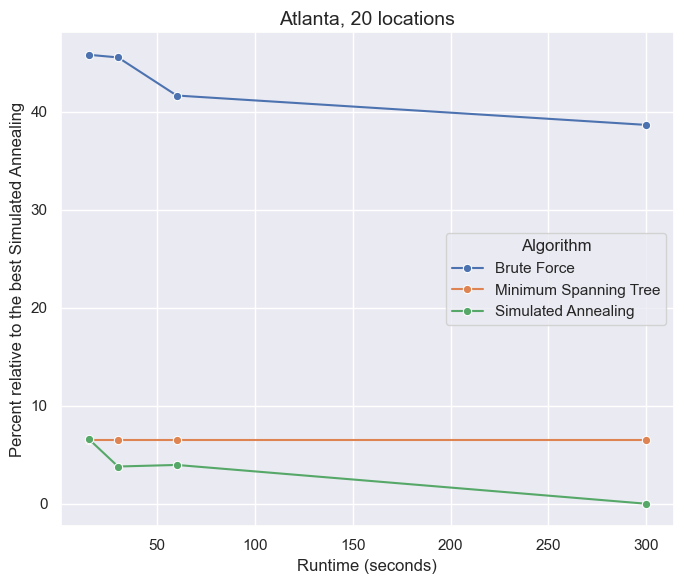

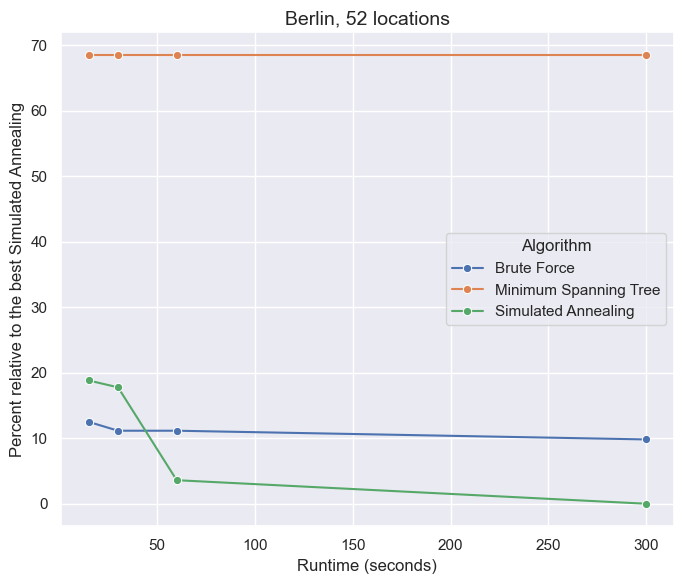

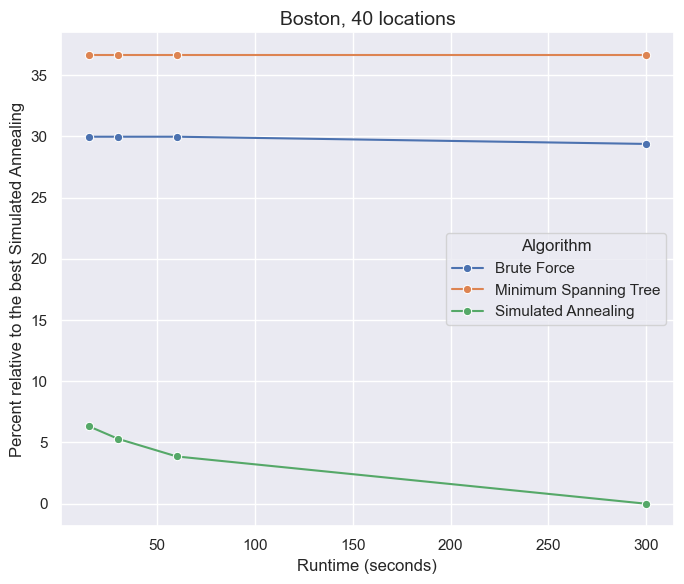

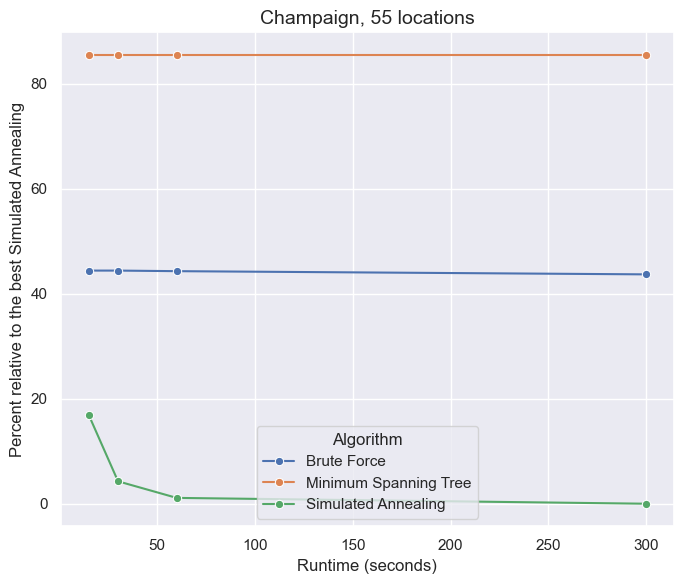

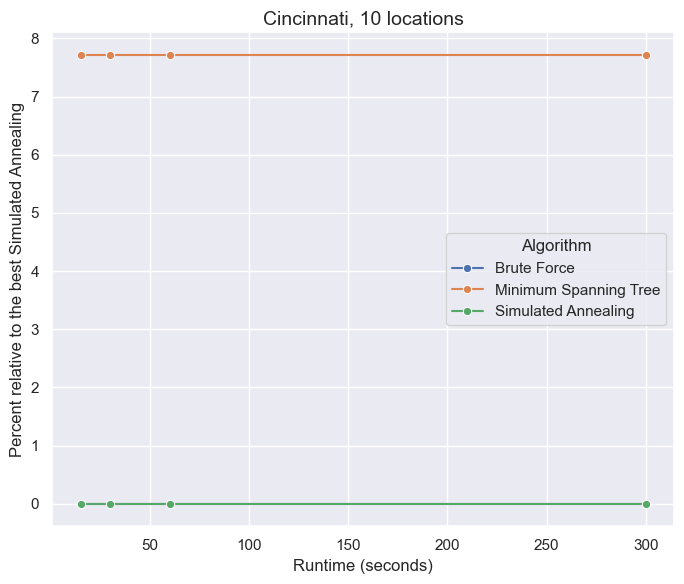

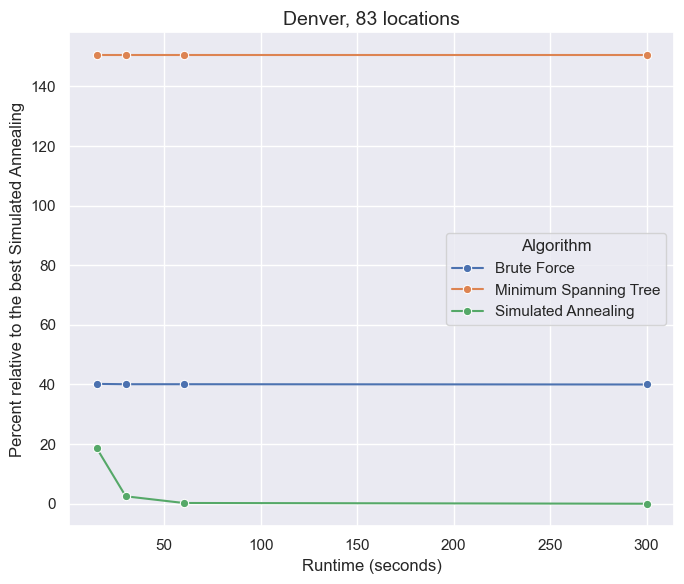

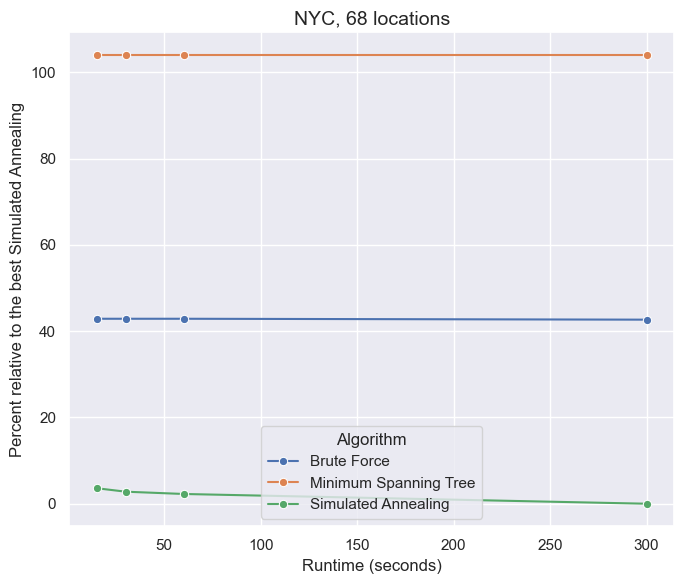

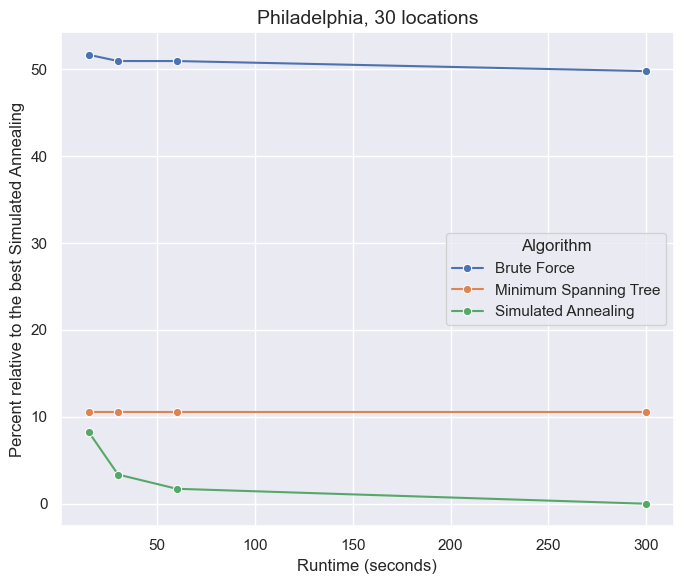

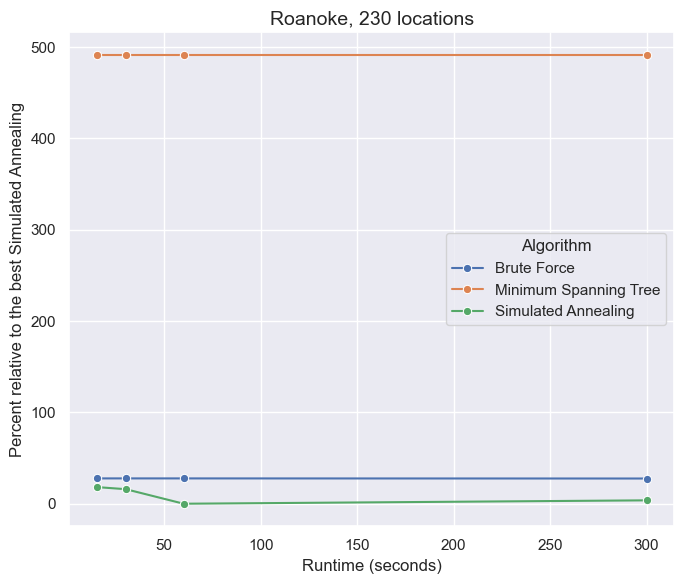

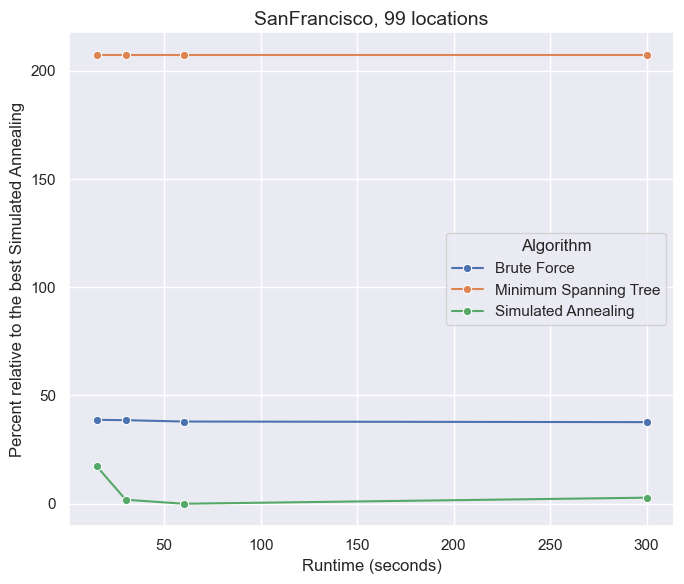

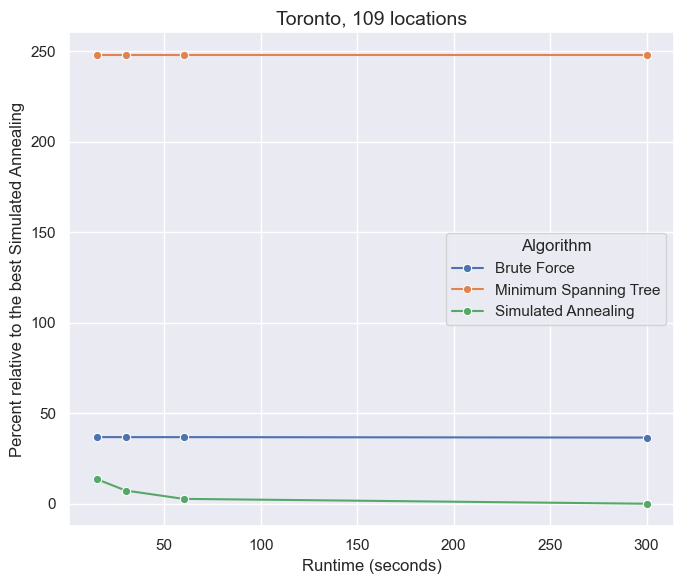

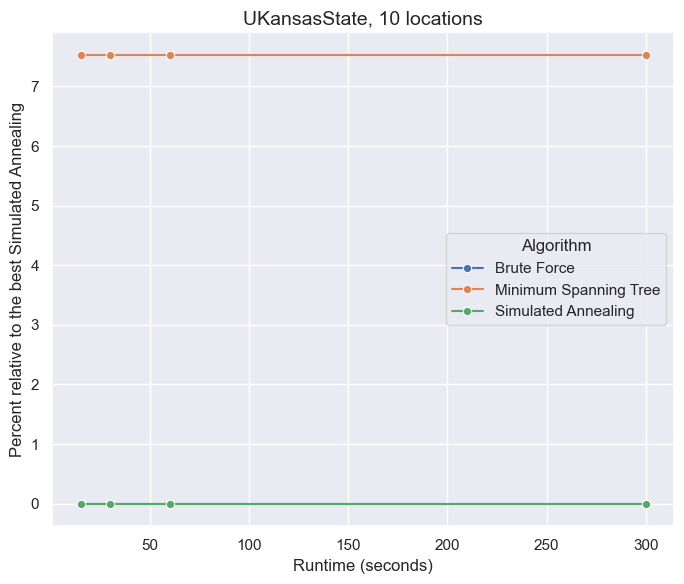

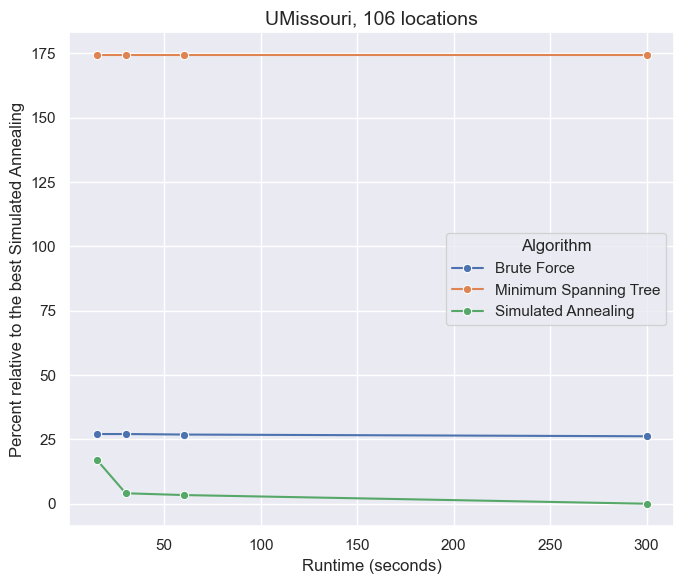

In [27]:
for e, city in enumerate(graphs):
    plot_quality_v_time(times, city, dimensions[e], BF[e], AP[e], LS[e])i

# Scratch

In [89]:
df = pd.read_csv('../output/ls_results.csv').T

In [90]:
df.to_csv('for_copying_to_deliverable.csv')

In [91]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
Unnamed: 0.1,0,1,2,3,4,5,6,7,8,9,10,11,12
Unnamed: 0,Atlanta,Berlin,Boston,Champaign,Cincinnati,Denver,NYC,Philadelphia,Roanoke,SanFransisco,Toronto,UKansasState,UMissouri
15,2383751.599584,21592.154443,1679287.207676,146742.737969,277952.586496,414736.169466,4291320.014076,1983411.310647,6062910.76962,4216679.847363,6743238.074682,62962.312807,589753.46669
30,2313977.818587,21317.669168,1660940.339539,127342.141393,277952.586496,346297.677227,4255917.060687,1882834.260362,5898881.133004,3554557.695093,6286286.828446,62962.312807,509878.989343
60,2317747.236801,18184.021365,1636113.080365,123268.11187,277952.586496,338544.012126,4232873.769924,1851419.911437,4959085.127712,3489123.333083,5989344.470689,62962.312807,506233.45953
300,2226067.852108,17531.173095,1572912.535786,121902.816635,277952.586496,337687.706553,4137317.792605,1819612.799647,5149364.104804,3589354.749411,5828905.502803,62962.312807,489173.658275
15.1,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
30.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
